**Course website**: http://www.leouieda.com/matematica-especial

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Integração Numérica

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [7]:
# Dessa vez vamos precisar da biblioteca matemática "math"
# Ela define funções como sin, cos, tan, exp e constantes como pi
import math

In [8]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Regra dos retângulos

O jeito mais simples de integração numérica é a regra dos retângulos. Nela, aproximamos a integral pela soma das áreas de retângulos. Cada retângulo se encontra abaixo de um dos pontos dos dados. A largura do retângulo é o espaçamento entre os dados $\Delta$. A altura do retângulo é o valor do dado naquela posição $d_i$.

Se tivermos nossos dados em um vetor de dados $\bar{d}$ (**nota**: vetores serão representados com uma barra em cima):

$$
\bar{d} = \left[ d_1 ~ d_2 ~ d_3 ~ \ldots ~ d_N \right],
$$

a integral poderá ser aproximada pela soma das áreas dos retângulos:

$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Algoritmo

Utilize a célula vazia abaixo (tipo Markdown) para colocar uma descrição do algoritmo em português (não em código). Não se esqueça de relacionar os passos do algoritmo com as fórmulas matemáticas do método.

**Dicas**:

* Help sobre Markdown: https://help.github.com/articles/markdown-basics/
* Como utilizar fórmulas matemáticas: https://www.sharelatex.com/learn/Mathematical_expressions


área é igual ao somatorio da multiplicacao entre o espacamento entre os dados (largura do retangulo) e o valor do dado na posição di(altura do retangulo), sendo i variando de 1 a N.

### Dados para teste

Vamos utilizar dados gerados a partir de uma função $d(t) = \cos(t)$ para testar o método de integração. A vantagem do cosseno é que sabemos quanto deve ser a integral:

$$
\int\limits_a^b \cos(t) dt = \sin(b) - \sin(a)
$$

O código abaixo gera duas listas: uma com os tempos variando entre os limites de integração; outra com os valores correspondentes do cosseno.

In [9]:
# inicio e fim são os intervalos de integração
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))

Espaçamento entre os dados: 0.0320570678937734


Utilize a célula abaixo para gerar um gráfico de `dados` por `tempos`.

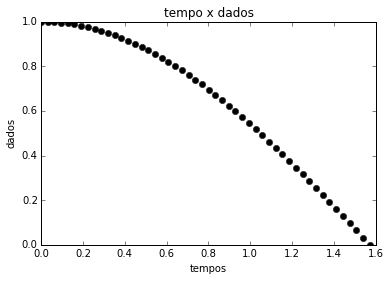

In [9]:
plt.plot(tempos, dados, "ok")
plt.title('tempo x dados')
plt.xlabel('tempos')
plt.ylabel('dados')


In [10]:
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))
    
print(tempos)
print(dados)

Espaçamento entre os dados: 0.0320570678937734
[0.0, 0.0320570678937734, 0.0641141357875468, 0.09617120368132019, 0.1282282715750936, 0.16028533946886697, 0.19234240736264038, 0.2243994752564138, 0.2564565431501872, 0.28851361104396056, 0.32057067893773394, 0.3526277468315074, 0.38468481472528077, 0.41674188261905415, 0.4487989505128276, 0.48085601840660097, 0.5129130863003744, 0.5449701541941477, 0.5770272220879211, 0.6090842899816945, 0.6411413578754679, 0.6731984257692414, 0.7052554936630148, 0.7373125615567881, 0.7693696294505615, 0.8014266973443349, 0.8334837652381083, 0.8655408331318817, 0.8975979010256552, 0.9296549689194286, 0.9617120368132019, 0.9937691047069753, 1.0258261726007487, 1.0578832404945222, 1.0899403083882955, 1.121997376282069, 1.1540544441758422, 1.1861115120696157, 1.218168579963389, 1.2502256478571625, 1.2822827157509358, 1.3143397836447093, 1.3463968515384828, 1.378453919432256, 1.4105109873260295, 1.4425680552198028, 1.4746251231135763, 1.5066821910073496, 1.

### Implementação

Implemente a regra dos retângulos para integrar os dados gerados acima. Coloque seu cógido na célula abaixo.

In [11]:
soma = 0
for i in dados:
    soma = soma + (i*intervalo)
print(soma)


1.01594289451325


Nas células abaixo calcule e imprima:

1. A solução analítica (verdadeira) para a integral
2. O erro cometido $E = \left|res_{true} - res_{calc}\right|$

Dica: a função `abs` calcula o valor absoluto de um número.

In [12]:
true = math.sin(fim) - math.sin(inicio)
calc = soma 

abs(true - calc)

0.01594289451325004

**Responda na célula abaixo:** Por que o erro não é zero e quais são os fatores que influenciam o erro?

Porque a integral calculada pela Reagra dos Retângulos retorna um valor aproximado do somatório.

### Resultado esperado

No caso acima estamos integrando o cosseno de 0 a $\pi/2$, então o valor esperado da integral é 1. Seu resultado não será exatamente 1 mas deve estar entre 0.9 e 1.1.

## Regra dos trapézios

A regra dos trapézios é parecida com a regra dos retângulos. Mas utilizaremos a área de um trapézio ao invés da área de um retângulo. O trapézio será definido com base em dois pontos adjacentes nos dados ($d_i$ e $d_{i+1}$, por exemplo).

$$
A = \sum\limits_{i=1}^{N - 1} \Delta \frac{d_i + d_{i+1}}{2}
$$

### Algoritmo

Descreva abaixo o algoritmo utilizado (em português) para fazer a integração numérica utilizando a regra dos trapézios.

área é igual ao somatorio da multiplicacao entre o espacamento entre os dados (largura do retangulo) e a média entre os valores dos dados na posição di e di+1 (bases do trapézio)

### Implementação

Vamos utilizar os mesmo dados utilizados na regra dos retângulos (na dúvida, rode novamente a célula que gera os dados). Abaixo, escreva e rode o código que faz a integração numérica com a regra dos trapézios. 

In [14]:
soma = 0
for i in range(0, N-1):
    soma = soma + (dados[i]*intervalo)
print(soma)

1.01594289451325


In [23]:
a = 0
for i in range(0, N-1):
    a = a + (((dados[i] + (dados[i+1])))/2)*intervalo
print(a)


    

0.9999997897839139


Calcule e imprima também a solução analíca e o erro cometido.

In [17]:
true = math.sin(fim) - math.sin(inicio)
cal = a 

abs(true - cal)

8.563943363693038e-05

**Responda na célula abaixo:** O erro é maior ou menos que para a regra dos retângulos? Por que? Você esperava isso?

o erro da regra dos trapézios é menor do que o erro da regra dos retangulos porque o cáculo para a regra dos retangulos assume uma função constante deixando quinas que distanciam do traço da função. Já pela regra dos trapézios, assume a integral da reta entre dois pontos e esta reta é mais próxima do traço da função se comparar as quinas formadas na regra dos retângulos. 

### Resultado esperado

Novamente, o valos esperado é 1 mas seu resultado não será exatamente 1 (mas deve estar entre 0.9 e 1.1).

## Comparação dos dois métodos

Vamos comparar o erro de ambos métodos. Uma comparação muito utilizada em métodos numéricos em geral é como o erro varia com o número de dados (ou pontos) utilizados.

Nas células abaixo, calcule o erro da integração numérica para diferentes valores de `N`. Os valores de N deverão variar de 10 a 1000 de 10 em 10. Mantenha os intervalos de integração entre $0$ e $\pi/2$. Faça esse cálculo para os dois métodos: retângulos e trapézios.

Ao final, faça um gráfico do erro pelos valores de `N`. O gráfico deverá ter duas curvas, uma para cada método. O eixo y (erros) deverá estar em escala logarítmica.

**Dicas**: 

* Gere uma lista dos valores de `N`.
* Para colocar o eixo y em escala log: `plt.yscale('log')`

In [22]:
inicio = 0
fim = math.pi/2
intervalo = (fim - inicio)/(N - 1)
Erro_retangulo = []
Ns = range(10, 1000, 10)
for N in Ns:
    intervalo = (fim - inicio)/(N - 1)
    tempos = []
    dados = []
    for i in range(N):
        t = inicio + i*intervalo
        tempos.append(t)
        dados.append(math.cos(t))
    soma = 0    
    for j in dados:
        soma = soma + (j*intervalo)
    abs(1-soma) 
    Erro_retangulo.append(soma)
print(Erro_retangulo)
    
    
    


[1.0847266943914422, 1.0407671050402472, 1.0268381925388663, 1.0200032255454698, 1.01594289451325, 1.0132527642783586, 1.0113393939802604, 1.0099088025629184, 1.0087987398960374, 1.0079123355326245, 1.00718818132651, 1.0065854645921066, 1.0060760017914667, 1.0056397043380907, 1.005261866997298, 1.0049314778247442, 1.004640127186015, 1.0043812819270905, 1.0041497896443843, 1.0039415322225256, 1.003753178709236, 1.0035820058140863, 1.0034257653839251, 1.0032825851113536, 1.0031508931435174, 1.003029360138274, 1.0029168542319578, 1.0028124056823637, 1.0027151788455864, 1.0026244497712875, 1.0025395881446875, 1.002460042622246, 1.0023853288395463, 1.0023150195400292, 1.0022487363995205, 1.0021861432161114, 1.0021269402066169, 1.0020708592053131, 1.0020176596027477, 1.0019671248948447, 1.00191905973793, 1.0018732874252085, 1.0018296477159607, 1.0017879949612605, 1.001748196480003, 1.0017101311470937, 1.0016736881621586, 1.0016387659723947, 1.0016052713275188, 1.001573118448292, 1.0015422282

In [25]:
inicio = 0
fim = math.pi/2
intervalo = (fim - inicio)/(N - 1)
Erro_trapézio = []
Ns = range(10, 1000, 10)
for N in Ns:
    intervalo = (fim - inicio)/(N - 1)
    tempos = []
    dados = []
    for i in range(N):
        t = inicio + i*intervalo
        tempos.append(t)
        dados.append(math.cos(t))
    soma = 0  
    a = 0
    for i in range(0, N-1):
        a = a + (((dados[i] + (dados[i+1])))/2)*intervalo
    abs(1-a) 
    Erro_trapézio.append(a)
print(Erro_trapézio)    


[0.9974602317917262, 0.9994303595982759, 0.9997554972492992, 0.9998648110993812, 0.9999143605663631, 0.9999409310004358, 0.9999568119020372, 0.9999670536591537, 0.9999740414308974, 0.999979020750832, 0.999982693588919, 0.9999854800257423, 0.9999876439356719, 0.9999893578388284, 0.9999907383838921, 0.9999918667341947, 0.9999928007753789, 0.999993582690233, 0.9999942438063029, 0.9999948077833422, 0.9999952927599657, 0.9999957128305357, 0.9999960790808794, 0.9999964003272636, 0.9999966836519615, 0.9999969347969707, 0.999997158457246, 0.9999973585017281, 0.9999975381417898, 0.9999977000609289, 0.9999978465155692, 0.999997979414103, 0.9999981003793714, 0.9999982107984449, 0.9999983118625644, 0.9999984045994058, 0.9999984898993073, 0.999998568536719, 0.9999986411878441, 0.999998708445226, 0.9999987708298677, 0.9999988288013486, 0.9999988827663163, 0.9999989330856416, 0.9999989800804546, 0.9999990240372962, 0.9999990652124845, 0.9999991038358655, 0.9999991401140264, 0.9999991742330654, 0.9999

**Responda na célula abaixo**: Como o erro varia com `N` para os dois métodos? Aumentar o número de dados de 50 para 200 nos dá a mesma diminuição no erro que aumentar de 650 para 800? Sempre vale a pena utilizar mais dados (lembre-se que a escala é logarítmica)? 

Para os dois métodos, N varia de 10 em 10. Assim, conforme aumenta o valor de N, o erro cada vez mais diminui. Aumentanto o numero de dados, mesmo tendo a mesma diferença (150), de 650 para 800 é mais preciso do quede 50 para 200. Porque quanto maior o valor de N, ou seja, de pontos no gráfico, mais preciso estará a integral, pois quanto mais pontos, maior sera a quantidade de pontos limites do ´poligono´ para descobrir sua area.

### Resultado esperado

O gráfico ao final deverá ser parecido com:

![images/erro-por-ndados.png](images/erro-por-ndados.png)

## Tarefa bônus: Probabilidades

Vamos assumir que uma variável aleatória $x$ segue uma [distribuição normal](https://en.wikipedia.org/wiki/Normal_distribution) com média zero e desvio padrão $\sigma$. Isso quer dizer que a [densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) para $x$ é

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{x^2}{2 \sigma^2} \right)
$$

A probabilidade de $x$ cair no intervalo $[a, b]$ é dada por ([refência](https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution)):

$$
P(a \leq x \leq b) = \int\limits_a^b f(x) dx
$$

Calcule na célula abaixo qual é a probabilidade de $x$ estar entre $[-\sigma, +\sigma]$ para $\sigma = 5$.